<a href="https://colab.research.google.com/github/abi13-ehub/PortfolioProject_DataAnalytics/blob/main/Classify_Handwritten_Digits_Using_Python_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description: This program uses convolutional neural networks(CNN) to classify handwritten digits as numbers from 0 to 9 

In [ ]:
# import the libraries 


In [2]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D , Flatten
from keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load the data and split it into training sets and testing sets
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Take a look at the first image (at index=0) in the training dataset
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# print the image label 
Y_train[0]

5

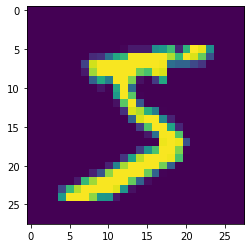

In [8]:
# show the image as a pic
plt.imshow(X_train[0])

In [9]:
# reshape the data to fit the model
X_train = X_train.reshape(60000,28,28,1) 
# depth of 1 indicates greyscale 
X_test = X_test.reshape(10000,28,28,1)

In [10]:
#  One -hot encoding: Encode the target data,ie 

Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

# print the new label
print(Y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# build the cnn model
model = Sequential()
# add model layers 
model.add(Conv2D(64, kernel_size=3,activation= 'relu', input_shape =(28,28,1)))
model.add(Conv2D(32, kernel_size =3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation ='softmax'))

In [13]:
# compile the model.
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
# train the model
hist = model.fit(X_train, Y_train_one_hot, validation_data =(X_test, Y_test_one_hot), epochs =3)

Epoch 1/3
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2454 - accuracy: 0.9490 - val_loss: 0.0836 - val_accuracy: 0.9739
Epoch 2/3
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0684 - accuracy: 0.9790 - val_loss: 0.0885 - val_accuracy: 0.9726
Epoch 3/3
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0472 - accuracy: 0.9846 - val_loss: 0.0965 - val_accuracy: 0.9736


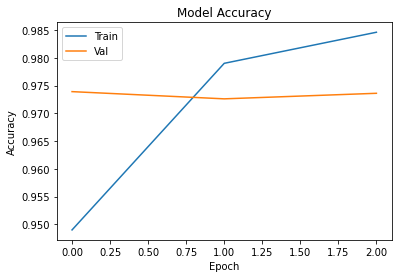

In [18]:
# Visualize the model's accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc ='upper left')
plt.show()

In [20]:
# Show predictions as probablities for the first 5 images in the test set
predictions = model.predict(X_test[:5])
predictions

array([[3.57305787e-12, 1.04689150e-16, 2.09204095e-11, 2.62365081e-08,
        6.09634557e-15, 2.18761103e-15, 8.77848527e-19, 9.99999881e-01,
        4.00281804e-12, 6.53347811e-08],
       [1.55683520e-05, 1.18113483e-07, 9.99982953e-01, 1.62807116e-12,
        1.83723140e-14, 9.28417736e-15, 1.36120923e-06, 7.75029980e-15,
        5.01344022e-10, 2.41548352e-14],
       [3.45595216e-13, 9.99996185e-01, 8.32696401e-08, 9.29554394e-13,
        3.55005386e-06, 1.10515845e-08, 2.48303178e-09, 2.29193290e-07,
        1.73791239e-08, 8.84383455e-10],
       [9.99999881e-01, 5.46058749e-13, 2.79390192e-11, 4.73874852e-14,
        1.35136932e-12, 1.95408728e-12, 2.27569141e-09, 8.24466051e-11,
        1.94168574e-12, 1.37861505e-07],
       [5.24589573e-11, 2.89525073e-16, 4.70389769e-11, 3.10002349e-13,
        1.00000000e+00, 1.11459493e-13, 7.67660539e-15, 1.97955172e-12,
        5.67116503e-13, 2.91468412e-11]], dtype=float32)

In [21]:
# print our predictions as number labels for the first 5 images.
print(np.argmax(predictions, axis=1))
# Print the actual labels 
print(Y_test[:5])


[7 2 1 0 4]
[7 2 1 0 4]


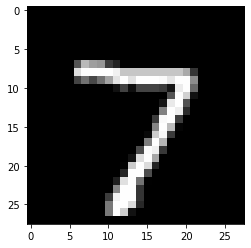

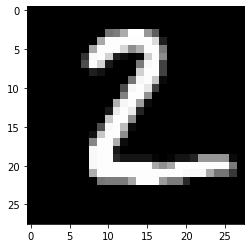

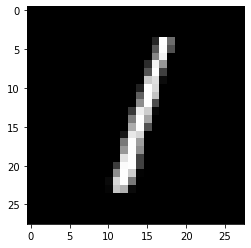

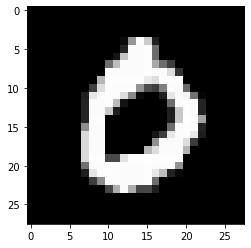

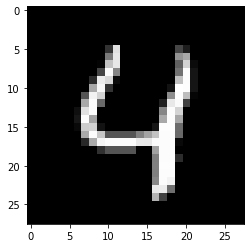

In [22]:
# Show the first 5 images as pic
for i in range(0,5):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap ='gray')
  plt.show()